In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_csv('/content/sensor_data_nRF_IMU_1_19092025_164551_not_labelled.csv')
data2 = pd.read_csv('/content/sensor_data_nRF_IMU_2_19092025_164551_labelled.csv')

In [6]:
data1.head()

,TimeStamp,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz
0,16:46:12,9.75,0.90,0.88,0.12,0.18,0.00,14.0,-67.0,-44.0
1,16:46:12,9.76,0.92,0.86,0.12,0.18,-0.12,15.0,-67.0,-42.0
2,16:46:12,9.77,0.91,0.87,0.18,0.18,-0.12,14.0,-65.0,-43.0
3,16:46:12,9.77,0.90,0.88,0.12,0.24,-0.12,14.0,-68.0,-45.0
4,16:46:12,9.78,0.91,0.87,0.18,0.06,-0.06,15.0,-68.0,-39.0


In [7]:
data2.head()

,TimeStamp,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Position,Unnamed: 11
0,16:55:31,-9.20,1.57,1.10,26.61,2.81,-12.08,21,32,-92,NaN,NaN
1,16:55:31,-9.36,1.38,1.25,28.99,-12.08,-14.77,24,33,-88,NaN,NaN
2,16:55:31,-9.37,1.18,1.40,39.92,-15.20,-10.93,26,31,-90,NaN,NaN
3,16:55:31,-9.31,1.37,1.66,39.12,-11.78,-2.44,29,32,-90,NaN,NaN
4,16:55:31,-9.46,1.58,1.74,23.99,-10.01,1.71,29,29,-92,NaN,NaN


In [8]:
data2 = data2.drop('Unnamed: 11', axis=1)
data2.head()

,TimeStamp,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Position
0,16:55:31,-9.20,1.57,1.10,26.61,2.81,-12.08,21,32,-92,NaN
1,16:55:31,-9.36,1.38,1.25,28.99,-12.08,-14.77,24,33,-88,NaN
2,16:55:31,-9.37,1.18,1.40,39.92,-15.20,-10.93,26,31,-90,NaN
3,16:55:31,-9.31,1.37,1.66,39.12,-11.78,-2.44,29,32,-90,NaN
4,16:55:31,-9.46,1.58,1.74,23.99,-10.01,1.71,29,29,-92,NaN


In [9]:
data2.dropna(inplace=True)
data2.head()

,TimeStamp,Ax,Ay,Az,Gx,Gy,Gz,Mx,My,Mz,Position
195,16:55:54,-8.99,1.25,1.24,-19.41,7.63,-5.55,37,28,-92,1.0
196,16:55:54,-10.44,1.07,2.00,-17.70,9.58,15.08,35,31,-88,1.0
197,16:55:54,-10.47,1.48,0.36,-139.34,2.01,-9.64,28,30,-92,1.0
198,16:55:54,-9.37,1.57,-0.37,-3.54,48.46,-33.57,25,30,-89,1.0
199,16:55:54,-12.47,-0.49,0.39,-57.19,-78.55,-24.35,25,29,-93,1.0


In [10]:
data = pd.merge(data1, data2, on=['TimeStamp'])
data.head()

,TimeStamp,Ax_x,Ay_x,Az_x,Gx_x,Gy_x,Gz_x,Mx_x,My_x,Mz_x,Ax_y,Ay_y,Az_y,Gx_y,Gy_y,Gz_y,Mx_y,My_y,Mz_y,Position
0,16:55:54,9.74,0.77,-0.9,0.37,-5.13,5.25,12.0,-79.0,-74.0,-8.99,1.25,1.24,-19.41,7.63,-5.55,37,28,-92,1.0
1,16:55:54,9.74,0.77,-0.9,0.37,-5.13,5.25,12.0,-79.0,-74.0,-10.44,1.07,2.00,-17.70,9.58,15.08,35,31,-88,1.0
2,16:55:54,9.74,0.77,-0.9,0.37,-5.13,5.25,12.0,-79.0,-74.0,-10.47,1.48,0.36,-139.34,2.01,-9.64,28,30,-92,1.0
3,16:55:54,9.74,0.77,-0.9,0.37,-5.13,5.25,12.0,-79.0,-74.0,-9.37,1.57,-0.37,-3.54,48.46,-33.57,25,30,-89,1.0
4,16:55:54,9.74,0.77,-0.9,0.37,-5.13,5.25,12.0,-79.0,-74.0,-12.47,-0.49,0.39,-57.19,-78.55,-24.35,25,29,-93,1.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TimeStamp  15081 non-null  object 
 1   Ax_x       15081 non-null  float64
 2   Ay_x       15081 non-null  float64
 3   Az_x       15081 non-null  float64
 4   Gx_x       15081 non-null  float64
 5   Gy_x       15081 non-null  float64
 6   Gz_x       15081 non-null  float64
 7   Mx_x       15081 non-null  float64
 8   My_x       15081 non-null  float64
 9   Mz_x       15081 non-null  float64
 10  Ax_y       15081 non-null  float64
 11  Ay_y       15081 non-null  float64
 12  Az_y       15081 non-null  float64
 13  Gx_y       15081 non-null  float64
 14  Gy_y       15081 non-null  float64
 15  Gz_y       15081 non-null  float64
 16  Mx_y       15081 non-null  int64  
 17  My_y       15081 non-null  int64  
 18  Mz_y       15081 non-null  int64  
 19  Position   15081 non-null  float64
dtypes: flo

In [12]:
data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])
data['delta_t'] = data['TimeStamp'].diff()
data['delta_t'] = data['delta_t'].dt.total_seconds().fillna(0)

/tmp/ipython-input-2131067612.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['TimeStamp'] = pd.to_datetime(data['TimeStamp'])


In [13]:
data.sample(10)

,TimeStamp,Ax_x,Ay_x,Az_x,Gx_x,Gy_x,Gz_x,Mx_x,My_x,Mz_x,...,Ay_y,Az_y,Gx_y,Gy_y,Gz_y,Mx_y,My_y,Mz_y,Position,delta_t
13295,2025-10-23 17:04:14,7.08,2.41,6.85,-29.36,-8.18,5.19,16.0,-67.0,-74.0,...,6.91,2.08,-1.95,1.10,3.72,37,30,-82,2.0,0.0
13314,2025-10-23 17:04:14,5.82,2.87,7.18,-18.86,0.85,-1.77,14.0,-69.0,-76.0,...,6.89,2.29,0.31,-3.78,5.86,37,29,-86,2.0,0.0
5182,2025-10-23 16:58:39,2.78,-3.83,10.34,-32.65,-30.15,56.64,5.0,-59.0,-66.0,...,1.76,2.18,21.97,-12.33,26.79,24,30,-83,4.0,0.0
8676,2025-10-23 17:01:46,1.44,1.34,9.94,-32.59,-21.61,0.85,14.0,-66.0,-70.0,...,6.68,2.76,-3.48,4.46,-4.21,32,30,-81,4.0,0.0
5694,2025-10-23 16:59:05,6.73,2.83,6.70,3.42,5.07,-4.94,14.0,-70.0,-76.0,...,7.11,2.38,-3.85,11.72,-5.37,37,32,-79,1.0,0.0
2097,2025-10-23 16:57:00,5.40,3.18,7.69,-6.65,11.41,-9.70,10.0,-67.0,-74.0,...,6.80,1.70,0.92,7.75,-1.04,32,32,-85,1.0,0.0
14740,2025-10-23 17:04:58,9.81,0.04,-1.08,7.02,9.40,-3.17,12.0,-76.0,-67.0,...,4.74,4.36,91.25,-85.57,-34.42,43,21,-32,9.0,0.0
8442,2025-10-23 17:01:37,6.32,2.68,7.43,-16.97,0.55,2.81,13.0,-68.0,-71.0,...,6.85,2.48,1.65,1.10,0.98,33,32,-79,12.0,0.0
1456,2025-10-23 16:56:40,9.78,0.44,-0.94,-0.49,0.67,-0.06,15.0,-79.0,-70.0,...,-5.68,8.27,424.50,194.82,8.48,39,29,-84,6.0,0.0
7528,2025-10-23 17:00:03,-0.92,2.63,10.15,15.99,-1.59,6.10,11.0,-61.0,-75.0,...,6.08,-3.77,-258.06,34.73,2.20,29,34,-74,12.0,0.0


In [14]:
G = nx.DiGraph()
nodes = list(range(1, 13))
G.add_nodes_from(nodes)
edge_weights = {}

In [15]:
for i in range(1, 12):
    mask = (data['Position'] == i)
    next_pose_indices = data.index[data['Position'] == i + 1].tolist()

    delta_ts = []
    for idx in next_pose_indices:
        prev_idx = idx - 1
        if prev_idx in data.index and data.loc[prev_idx, 'Position'] == i:
            delta_ts.append(data.loc[idx, 'delta_t'])

    if delta_ts:
        avg_weight = sum(delta_ts) / len(delta_ts)
    else:
        avg_weight = 0

    edge_weights[(i, i+1)] = avg_weight
    G.add_edge(i, i+1, weight=avg_weight)

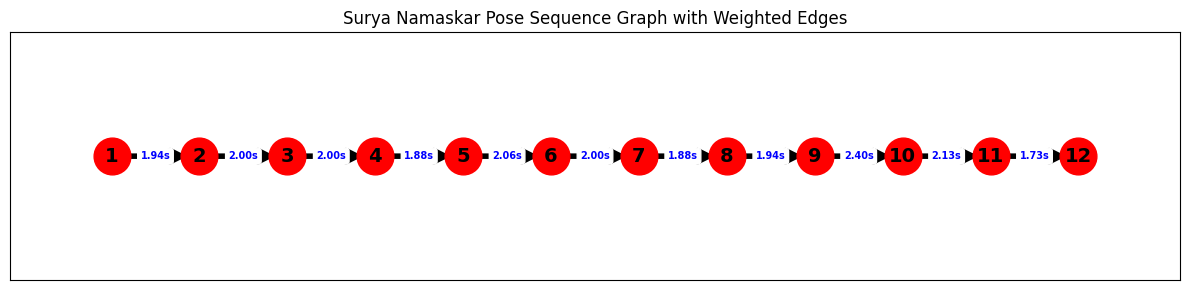

In [17]:
pos = {i: (i, 0) for i in range(1, 13)}

plt.figure(figsize=(12, 3))

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='red')

nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')

nx.draw_networkx_edges(G, pos, edge_color='black', width=4, arrowsize=20)

edge_labels = {(u, v): f"{d['weight']:.2f}s" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5,
                             font_color='blue', font_size=7, rotate=False, font_weight='bold')

plt.title("Surya Namaskar Pose Sequence Graph with Weighted Edges")
plt.tight_layout()
plt.show()